### Omar Chaouch
### Raphael Kaya

# Algorithmen in der Bioinformatik – Übungsblatt 5
## Abgabe: Freitag, 31.5., 10:30 Uhr (2 Wochen Bearbeitungszeit)

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [ ]:
from IPython.display import Image
Image('test.png')

In [ ]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 5.1 (10 Punkte, 5 + 5)

(a) Wenden Sie den Needleman-Wunsch-Algorithmus auf die beiden Strings $v = \mathit{APPLE}$ und $w = \mathit{HAPE}$ an, um **alle** optimalen Alignments zu finden. Das Scoring-Schema ist folgendermaßen: $+1$ für Match, $-1$ für Mismatch und $-1$ für Indel.
Geben Sie dabei Folgendes für Ihre Lösung an:
- die vollständig ausgefüllte DP-Matrix,
- alle Backtracking-Pfeile für die DP-Matrix (bei mehreren optimalen Vorgängern muss für jeden davon ein Pfeil angegeben werden),
- alle optimalen Alignments (d. h. beide Strings so übereinander geschrieben, dass die jeweils miteinander assoziierten Zeichen übereinander stehen, inklusive der nötigen Gaps ("-")).

(b) Implementieren Sie den Needleman-Wunsch-Algorithmus, der für 2 Strings $v$ und $w$ und ein Scoring-Schema (bestehend aus Match-Score, Mismatch-Score, Indel-Score) zwei Rückgabewerte ausgibt: Der erste Rückgabewert soll der optimale Score sein und der zweite soll eine Liste aus zwei Strings sein, die ein optimales Alignment enthalten.

### Antwort b)

In [98]:
def needleman_wunsch(v, w, match_score, mismatch_score, indel_score):
    if len(w) == 0 or len(v) == 0:
        print("Fehler, keine Sequenz angegeben.")
        return 

    def createGrid(v, w, match_score, mismatch_score, indel_score):
        grid = [[0] * (len(w) + 1) for _ in range(len(v) + 1)]
        
        for i in range(1, len(v) + 1):
            grid[i][0] = i * indel_score
        for j in range(1, len(w) + 1):
            grid[0][j] = j * indel_score

        for i in range(1, len(v) + 1):
            for j in range(1, len(w) + 1):
                match = grid[i-1][j-1] + (match_score if v[i-1] == w[j-1] else mismatch_score)
                delete = grid[i-1][j] + indel_score
                insert = grid[i][j-1] + indel_score
                grid[i][j] = max(match, delete, insert)

        return grid

    def backtracking(grid, v, w):
        i, j = len(v), len(w)
        aligned_v, aligned_w = [], []

        while i > 0 or j > 0:
            if i > 0 and j > 0 and grid[i][j] == grid[i-1][j-1] + (match_score if v[i-1] == w[j-1] else mismatch_score):
                aligned_v.append(v[i-1])
                aligned_w.append(w[j-1])
                i -= 1
                j -= 1
            elif i > 0 and grid[i][j] == grid[i-1][j] + indel_score:
                aligned_v.append(v[i-1])
                aligned_w.append('-')
                i -= 1
            else:
                aligned_v.append('-')
                aligned_w.append(w[j-1])
                j -= 1

        aligned_v.reverse()
        aligned_w.reverse()
        string_v = ''.join(aligned_v)
        string_w = ''.join(aligned_w)

        return grid[len(v)][len(w)], [string_v, string_w]

    return backtracking(createGrid(v, w, match_score, mismatch_score, indel_score), v, w)


In [99]:
test(needleman_wunsch('AAAA', 'AA', 1, -1, 0)[0], 2)
test(needleman_wunsch('AAAA', 'ATA', 2, -9, -1)[0], 1)
test(needleman_wunsch('AGACA', 'ACATA', 1, -2, -9)[0], -1)
test(needleman_wunsch('AGACA', 'ACATA', 1, -2, -9)[1], ['AGACA', 'ACATA'])
test(needleman_wunsch('ATTT', 'TTTA', 1, -2, -2)[1], ['ATTT-', '-TTTA'])

# von den folgenden Testfällen muss nur einer korrekt sein, da die Instanz mehrere optimale Lösungen hat
print(['AAAA', 'AA--'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])
print(['AAAA', 'A-A-'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])
print(['AAAA', 'A--A'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])
print(['AAAA', '-AA-'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])
print(['AAAA', '-A-A'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])
print(['AAAA', '--AA'] == needleman_wunsch('AAAA', 'AA', 1, -1, 0)[1])

 OK  got: 2 expected: 2
 OK  got: 1 expected: 1
 OK  got: -1 expected: -1
 OK  got: ['AGACA', 'ACATA'] expected: ['AGACA', 'ACATA']
 OK  got: ['ATTT-', '-TTTA'] expected: ['ATTT-', '-TTTA']
False
False
False
False
False
True


### Antwort

a)

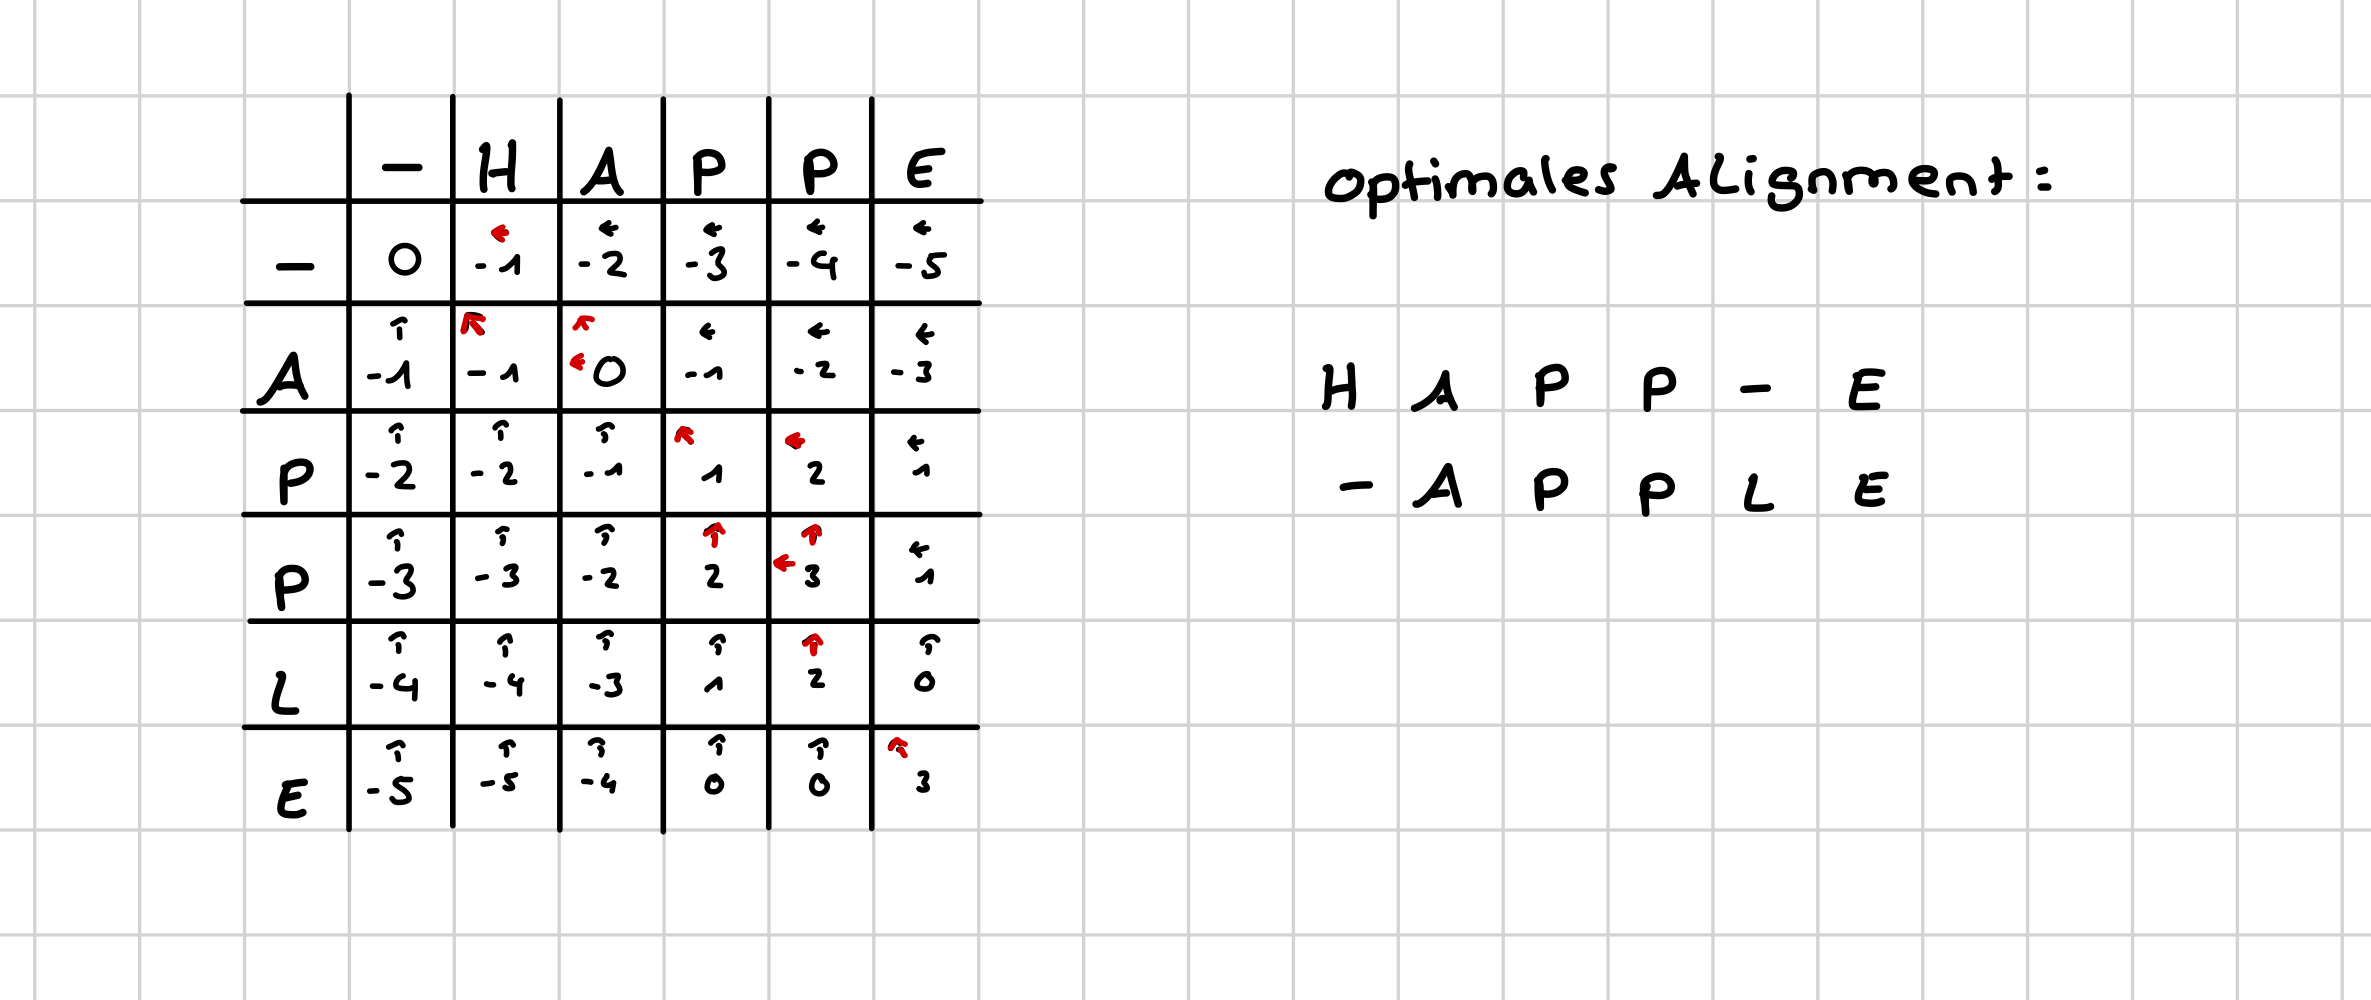

In [100]:
from IPython.display import Image
Image('05a.jpeg')

## Aufgabe 5.2 (8 Punkte)

Gegeben sind zwei Strings $v = v_1 v_2 \dots v_{n}$ und $w = w_1 w_2 \dots w_{m}$ und ein Scoring-Schema mit Match-Score, Mismatch-Score sowie Indel-Score. Das Ziel ist es, eine Matrix $M$ zu berechnen, wobei der Eintrag $M_{i, j}$ definiert ist als der Score eines optimalen globalen Alignments zwischen $v$ und $w$, bei dem die Zeichen $v_i$ und $w_j$ miteinander aligniert sein müssen. Zur Bestimmung von $M_{i, j}$ dürfen die Zeichen $v_i$ und $w_j$ also nicht mit einem Gap aligniert werden.

Beschreiben Sie einen Algorithmus, der die Matrix $M$ in Zeit $\mathcal{O}(n \cdot m)$ berechnet, und begründen Sie, warum die Laufzeit eingehalten wird. Es gibt Teilpunkte, wenn Sie eine schlechtere Laufzeit erzielen und diese richtig analysieren.

**Hinweis:** Versuchen Sie, die Berechnung eines Matrixeintrags in kleinere Schritte zu zerlegen. Überlegen Sie sich zunächst, wie $M$ naiv (d. h. mit einer größeren Laufzeit) berechnet werden kann. Um auf die effiziente Gesamtlaufzeit zu kommen, müssen Zwischenergebnisse wiederverwendet werden.

### Antwort

Um die Matrix MM zu berechnen, verwenden wir den Smith-Waterman-Algorithmus, also lokale Alignments. Gegeben sind zwei Strings $v = v_1 v_2… v_n$ und $w = w_1 w_2… w_m$ sowie ein Scoring-Schema, das Match-Score, Mismatch-Score und Indel-Score beinhaltet. Unser Ziel ist es, die Matrix M zu berechnen, wobei der Eintrag $M_{i,j}$ den Score eines optimalen lokalen Alignments zwischen v und w darstellt, bei dem die Zeichen $v_i$ und $w_j$ miteinander aligniert sein müssen, also ohne eine Gap, wie es bei dem lokalen Alignment der Fall ist.

Zunächst initialisieren wir eine Matrix M der Größe $(n+1)×(m+1)$. Die erste Zeile und die erste Spalte der Matrix werden entsprechend der Indel-Scores initialisiert. Dadurch können wir rekursive die Folgezellen "berechnen". Dabei wird jede Zelle basierend auf der vorherigen oberen, linken oder diagonalen mit den folgenden Beziehungen berechnet:

$
M_{i,j} = \max \begin{cases}
M_{i-1,j-1} + \text{score}(v_i, w_j) \\
M_{i-1,j} + \text{indel\_score} \\
M_{i,j-1} + \text{indel\_score}
\end{cases}
$

$
\text{score}(v_i, w_j) = \begin{cases}
\text{match\_score}, & \text{wenn } v_i = w_j \\
\text{mismatch\_score}, & \text{wenn } v_i \neq w_j
\end{cases}
$

Wenn wir von oben oder links kommen, nutzen wir den indel_score, welcher "bestraft", dass wir eine Lücke haben. Wenn wir Zeichen direkt miteinander vergleichen, wird betrachtet, ob sie ein match oder mismatch sind. Diese Beziehung sorgt dafür, dass wir den optimalen Score für jeden Eintrag $M_{i,j}$ erhalten, indem wir die besten vorherigen Scores und die entsprechenden Kosten für Matches, Mismatches und Indels berücksichtigen.

Die Initialisierung des Algorithmus dauert $O(n+m)$ , da ein Gitter mit (n+1) Spalten und (m+1) Zellen initialisiert wird. Da wir alles rekursiv berechnen, muss jede Zelle berechnet werden, wodurch wir eine Laufzeit von $O(n*m)$ erhalten.


## Aufgabe 5.3 (2 Punkte, 1 + 1)

(a) Wir vergleichen globales und lokales Alignment für ein festes Scoring-Schema, welches $+1$ für Matches, $-1$ für Mismatches und $-1$ für Indels vergibt. Seien $GA_{1, -1, -1}(v, w)$ und $LA_{1, -1, -1}(v, w)$ die Alignment-Scores bezüglich globalem (GA) und lokalen (LA) Alignment für zwei Strings $v, w$. Welche der folgenden Aussagen sind zutreffend und welche nicht? Geben Sie eine Begründung bzw. ein Gegenbeispiel an.

- $GA_{1, -1, -1}(v, w) \leq LA_{1, -1, -1}(v, w)$ für alle Strings $v$ und $w$
- $GA_{1, -1, -1}(v, w) \geq LA_{1, -1, -1}(v, w)$ für alle Strings $v$ und $w$

(b) Wie ändert sich die Gültigkeit der beiden obigen Aussagen, wenn wir nicht ein fixes Scoring-Schema betrachten, sondern Match-Score $\alpha$, Mismatch-Score $\mu$ und Indel-Score $\sigma$ beliebige ganze Zahlen sein können? Begründen Sie Ihre Antworten.

### Antwort 

a)

Aussage 1 ist korrekt, Aussage 2 ist falsch. Der Grund ist, dass bei dem Lokalem Alignment (LA) die besten Teilbereiche ausgewählt werden und potenzielle anfängliche Mismatches übersprungen werden. Damit beginnt das  LA mit einem Match, während das globale Alignment (GA) alle Mismatches miteinbezieht. Treten keine Mismatches vor dem ersten Match auf, so ist das LA gleich große GA und falls mindestens ein Mismatch davor auftritt, so ist LA mindestens +1 großer als GA.

b)

Aussage 1: $GAα,μ,σ(v,w)≤LAα,μ,σ(v,w)$ ist immer zutreffend, da das lokale Alignment die besten Teilbereiche auswählt und somit nie schlechter abschneidet als das globale Alignment.
Aussage 2: $GAα,μ,σ(v,w)≥LAα,μ,σ(v,w)$ ist nicht zutreffend, da das globale Alignment die gesamte Sequenz berücksichtigt und daher oft eine geringere Punktzahl aufweist als das lokale Alignment.

